# Anatomy of a NIfTI

---
#### Objectives
1. Introduce Python data types
1. Load a NIfTI file into Python and understand how data is stored
1. View and manipulate image data
---

In the last lesson, we introduced the NIfTI. NIfTI is one of the most ubiquitous file formats for storing neuroimaging data. We'll cover a few details to get started working with them. If you're interested in learning more about NIfTI images, we highly recommend [this blog post about the NIfTI format](http://brainder.org/2012/09/23/the-nifti-file-format/).

## Reading NIfTI Images

[NiBabel](http://nipy.org/nibabel/) is a Python package for reading and writing neuroimaging data. To learn more about how NiBabel handles NIfTIs, check out the [Working with NIfTI images](http://nipy.org/nibabel/nifti_images.html) page of the NiBabel documentation.

In [1]:
import nibabel as nib

First, use the `load()` function to create a NiBabel image object from a NIfTI file. We'll load in an example T1w image from the zip file we just downloaded.

In [2]:
t1_img = nib.load('someones_anatomy.nii.gz')

Loading in a NIfTI file with `nibabel` gives us a special type of data object which encodes all the information in the file. Each bit of information is called an **attribute** in Python's terminology. To see all of these attributes, type `t1_img.` and <kbd>Tab</kbd>.  
There are three main attributes that we'll discuss today:

### 1. [Header](http://nipy.org/nibabel/nibabel_images.html#the-image-header): contains metadata about the image, such as image dimensions, data type, etc.

In [3]:
t1_hdr = t1_img.header
print(t1_hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 57 67 56  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.   2.75 2.75 2.75 1.   1.   1.   1.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -78.0
qoffset_y       : -91.0
qoffset_z       : -91.0
srow_x          : [  2.75   0.     0.   -78.  ]
srow

`t1_hdr` is a Python **dictionary**. Dictionaries are containers that hold pairs of objects - keys and values. Let's take a look at all of the keys.
Similar to `t1_img` in which attributes can be accessed by typing `t1_img.` and hitting <kbd>Tab</kbd>, you can do the same with `t1_hdr`. In particular, we'll be using a **method** belonging to `t1_hdr` that will allow you to view the keys associated with it.

In [4]:
t1_hdr.keys()

['sizeof_hdr',
 'data_type',
 'db_name',
 'extents',
 'session_error',
 'regular',
 'dim_info',
 'dim',
 'intent_p1',
 'intent_p2',
 'intent_p3',
 'intent_code',
 'datatype',
 'bitpix',
 'slice_start',
 'pixdim',
 'vox_offset',
 'scl_slope',
 'scl_inter',
 'slice_end',
 'slice_code',
 'xyzt_units',
 'cal_max',
 'cal_min',
 'slice_duration',
 'toffset',
 'glmax',
 'glmin',
 'descrip',
 'aux_file',
 'qform_code',
 'sform_code',
 'quatern_b',
 'quatern_c',
 'quatern_d',
 'qoffset_x',
 'qoffset_y',
 'qoffset_z',
 'srow_x',
 'srow_y',
 'srow_z',
 'intent_name',
 'magic']

Notice that **methods** require you to include `()` at the end of them whereas **attributes** do not.
The key difference between a method and an attribute is:
- Attributes are *stored values* kept within an object
- Methods are *processes* that we can run using the object. Usually a method takes attributes, performs an operation on them, then returns it for you to use.

When you type in `t1_img.` followed by <kbd>Tab</kbd>, you'll see that attributes are highlighted in <span style="color:orange"> orange </span> and methods highlighted in <span style="color:blue"> blue </span>.

The output above is a list of **keys** you can use from `t1_hdr` to access **values**. We can access the value stored by a given key by typing:

```python
t1_hdr['<key_name>']
```

<b>EXERCISE:</b> Extract the value of <code>pixdim</code> from <code>t1_hdr</code>

In [5]:
t1_hdr['pixdim']

array([1.  , 2.75, 2.75, 2.75, 1.  , 1.  , 1.  , 1.  ], dtype=float32)

### 2. Data
As you've seen above, the header contains useful information that gives us information about the properties (metadata) associated with the MR data we've loaded in. Now we'll move in to loading the actual *image data itself*. We can achieve this by using the *method* called `t1_img.get_fdata()`.

In [6]:
t1_data = t1_img.get_fdata()
t1_data

array([[[ 8.79311806,  8.79311806,  8.79311806, ...,  7.73574093,
          7.73574093,  7.38328189],
        [ 8.79311806,  9.1455771 ,  8.79311806, ...,  8.08819997,
          8.08819997,  8.08819997],
        [ 9.1455771 ,  8.79311806,  8.79311806, ...,  8.44065902,
          8.44065902,  8.44065902],
        ...,
        [ 8.08819997,  8.44065902,  8.08819997, ...,  7.38328189,
          7.38328189,  7.38328189],
        [ 8.08819997,  8.08819997,  8.08819997, ...,  7.73574093,
          7.38328189,  7.38328189],
        [ 8.08819997,  8.08819997,  8.08819997, ...,  7.38328189,
          7.38328189,  7.03082284]],

       [[ 8.79311806,  9.1455771 ,  8.79311806, ...,  7.73574093,
          7.38328189,  7.38328189],
        [ 8.79311806,  9.1455771 ,  9.1455771 , ...,  8.08819997,
          7.73574093,  8.08819997],
        [ 8.79311806,  9.49803615,  9.1455771 , ...,  8.44065902,
          8.44065902,  8.44065902],
        ...,
        [ 8.08819997,  8.08819997,  8.08819997, ...,  

What type of data is this exactly? We can determine this by calling the `type()` function on `t1_data`.

In [7]:
type(t1_data)

numpy.ndarray

The data is a multidimensional **array** representing the image data. In Python, an array is used to store lists of numerical data into something like a table.

<b>EXERCISE:</b> Let's check out some *attributes* of the array. How can we see the number of dimensions in the <code>t1_data</code> array? What about the how big each dimension is (shape)? Once again, all of the attributes of the array can be seen by typing `t1_data.` and <kbd>Tab</kbd>.

In [8]:
t1_data.ndim

3

`t1_data` contains 3 dimensions. You can think of the data as a 3D version of a picture (more accurately, a volume).

<img src="numpy_arrays.png" alt="Drawing" align="middle" width="600px"/>

While typical 2D pictures are made out of squares called **pixels**, a 3D MR image is made up of 3D cubes called **voxels**.

<img src="http://www.sprawls.org/mripmt/MRI10/MR10-2.jpg" alt="Drawing" align="middle" width="500px"/>

In [9]:
t1_data.shape

(57, 67, 56)

The 3 numbers given here represent the number of values *along a respective dimension (x,y,z)*. This brain was scanned in 57 slices with a resolution of 67 x 56 voxels per slice. That means there are:

$$x * y * z = value$$
$$ 57 * 67 * 56 = 213864$$ voxels in total!

Let's see the type of data inside of the array.

In [10]:
t1_data.dtype

dtype('float64')

This tells us that each element in the array (or voxel) is a floating-point number.   
The data type of an image controls the range of possible intensities. As the number of possible values increases, the amount of space the image takes up in memory also increases.

In [11]:
import numpy as np

print(np.min(t1_data))
print(np.max(t1_data))

6.678363800048828
96.55541983246803


For our data, the range of intensity values goes from 0 (black) to more positive digits (whiter).

How do we examine what value a particular voxel is? We can inspect the value of a voxel by selecting an **index** as follows:

~~~python
data[x,y,z]
~~~

So for example we can inspect a voxel at coordinates (10,20,3) by doing the following:

In [12]:
t1_data[9, 19, 2]

32.40787395834923

**NOTE**: Python uses **zero-based indexing**. The first item in the array is item 0. The second item is item 1, the third is item 2, etc.

This yields a single value representing the intensity of the signal at a particular voxel! Next we'll see how to not just pull one voxel but a slice or an *array* of voxels for visualization and analysis!

## Working With Image Data

Slicing does exactly what it seems to imply. Giving our 3D volume, we pull out a 2D slice of our data. Here's an example of slicing from left to right (**sagittal slicing**):

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Parasagittal_MRI_of_human_head_in_patient_with_benign_familial_macrocephaly_prior_to_brain_injury_%28ANIMATED%29.gif"/>

This gif is a series of 2D images or **slices** moving from left to right.

Let's pull the 10th slice in the x axis.

In [13]:
x_slice = t1_data[9, :, :]

This is similar to the indexing we did before to pull out a single voxel. However, instead of providing a value for each axis, the `:` indicates that we want to grab *all* values from that particular axis.

<b>EXERCISE:</b> Now try selecting the 20th slice from the y axis.

In [14]:
y_slice = t1_data[:, 19, :]

Finally try grabbing the 3rd slice from the z axis.

In [15]:
z_slice = t1_data[:, :, 2]

We've been slicing and dicing brain images but we have no idea what they look like! In the next section we'll show you how you can visualize brain slices!

## Visualizing

We previously inspected the signal intensity of the voxel at coordinate 10, 20, 3. Let's see what out data looks like when we slice it at this location. We've already indexed the data at each x, y, and z axis. Let's use `matplotlib`.

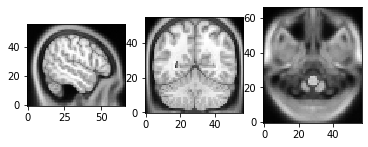

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

slices = [x_slice, y_slice, z_slice]

fig, axes = plt.subplots(1, len(slices))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

Now, we're going to step away from discussing our data and talk about the final important attribute of a NIfTI.

### 3. [Affine](http://nipy.org/nibabel/coordinate_systems.html): tells the position of the image array data in a *reference space*

The final important piece of metadata associated with an image file is the **affine matrix**. Below is the affine matrix for our data.

In [17]:
t1_affine = t1_img.affine
t1_affine

array([[  2.75,   0.  ,   0.  , -78.  ],
       [  0.  ,   2.75,   0.  , -91.  ],
       [  0.  ,   0.  ,   2.75, -91.  ],
       [  0.  ,   0.  ,   0.  ,   1.  ]])

To explain this concept, recall that we referred to coordinates in our data as (x,y,z) coordinates such that:

- x is the first dimension of `t1_data`
- y is the second dimension of `t1_data`
- z is the third dimension of `t1_data`

Although this tells us how to access our data in terms of voxels in a 3D volume, it doesn't tell us much about the actual dimensions in our data (centimetres, right or left, up or down, back or front). The affine matrix allows us to translate between *voxel coordinates (x,y,z)* and *world space coordinates* in (left/right,bottom/top,back/front). An important thing to note is that in reality in which order you have:

- left/right
- bottom/top
- back/front

Depends on how you've constructed the affine matrix, but for the data we're dealing with it always refers to:

- Right
- Anterior
- Superior

Applying the affine matrix (`t1_affine`) is done through using a *linear map* (matrix multiplication) on voxel coordinates (defined in `t1_data`). 

<img src="coordinate_systems.png" alt="Drawing" align="middle" width="300px"/>

The concept of an affine matrix may seem confusing at first but an example might help gain an intuition:

Suppose we have two voxels located at the the following coordinates:

$$(15,2,90)$$
$$(64,100,2)$$

And we wanted to know what the distances between these two voxels are in terms of real world distances (millimetres). This information cannot be derived from using voxel coordinates so we turn to the **affine matrix**. 

Now, the affine matrix we'll be using happens to be encoded in **RAS**. That means once we apply the matrix our coordinates are as follows:

$$(\text{Right},\text{Anterior},\text{Superior})$$

So increasing a coordinate value in the first dimension corresponds to moving to the right of the person being scanned. 

Applying our affine matrix yields the following coordinates:

$$(90.23,0.2,2.15)$$
$$(10.25,30.5,9.2)$$

This means that:

- Voxel 1 is $90.23-10.25= 79.98$ in the R axis. Positive values mean move right
- Voxel 1 is $0.2-30.5= -30.3$ in the A axis. Negative values mean move posterior
- Voxel 1 is $2.15-9.2= -7.05$ in the S axis. Negatve values mean move inferior

This covers the basics of how NIfTI data and metadata are stored and organized in the context of Python. In the next segment we'll talk a bit about an increasingly important component of MR data analysis - data organization. This is a key component to reproducible analysis and so we'll spend a bit of time here. 

---

#### References